AI ASSIGNMENT

DIAMOND MARKET PREDICTION USING LSTM

IMPORTING REQUIRED LIBRARIES


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

DATA COLLECTION
The dataset was downloaded from Yahoo Finance and it is read below to show its content.

In [ ]:
#reading the dataset
Diamonds = pd.read_csv('/content/drive/MyDrive/DMD-USD(AI).csv')
#the dataframe is assigned Diamonds
#pandas is used to read the dataset
#the information in the parenthesis shows the ocation of the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#this line of code is generated by Collab to show that google drive is mounted
#the dataset is stored at google drive and this line of code mounts it to Collab

In [ ]:
#SHAPE OF THE DATASET
print(Diamonds.shape)
#this will show how many samples and attributes are contained in the dataset

(2209, 7)


In [ ]:
#First five samples
Diamonds.head()
#the first five samples are displayed with all their attributes, starting from [0 - 4]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,9.05696,10.83510,8.74180,9.88131,9.88131,224462
1,2017-11-10,10.02280,10.26260,7.98850,8.55917,8.55917,76978
2,2017-11-11,8.52871,8.85620,7.83736,8.00574,8.00574,48725
3,2017-11-12,7.99985,8.13646,7.04651,7.86338,7.86338,110858
4,2017-11-13,7.82754,9.28428,7.43337,8.72563,8.72563,126582


In [ ]:
#Last five samples
Diamonds.tail()
#the last five samples are displayed with all their attributes, starting from [2204 - 2208]

,Date,Open,High,Low,Close,Adj Close,Volume
2204,2023-11-22,2.134621,2.281923,2.124359,2.253470,2.253470,5426
2205,2023-11-23,2.253410,2.284684,2.239232,2.262462,2.262462,6294
2206,2023-11-24,2.262434,2.322379,2.238530,2.272477,2.272477,10857
2207,2023-11-25,2.272467,2.294216,2.259231,2.276209,2.276209,4843
2208,2023-11-26,2.276056,2.276788,2.246293,2.249418,2.249418,5289


EXPLANATORY DATA ANALYSIS

Various vizualizations will be made to further understand the dataset

In [ ]:
#DESCRPTION OF THE DATASET
Diamonds.describe().transpose()
#the above command shows all the statistical analysis of the dataset, for example count, mean and standard deviation

,count,mean,std,min,25%,50%,75%,max
Open,2209.0,2.824443,3.717243,0.126775,0.923981,2.023818,3.133426,3.219370e+01
High,2209.0,2.973466,4.054926,0.135501,0.975511,2.073374,3.214860,4.239920e+01
Low,2209.0,2.672446,3.416961,0.106814,0.862531,1.970406,3.032488,3.014450e+01
Close,2209.0,2.820731,3.709128,0.126747,0.923981,2.022530,3.132600,3.202000e+01
Adj Close,2209.0,2.820731,3.709128,0.126747,0.923981,2.022530,3.132600,3.202000e+01
Volume,2209.0,28220.586691,228566.956770,0.000000,2372.000000,9089.000000,19506.000000,9.996360e+06


Text(0, 0.5, 'Prices ($)')

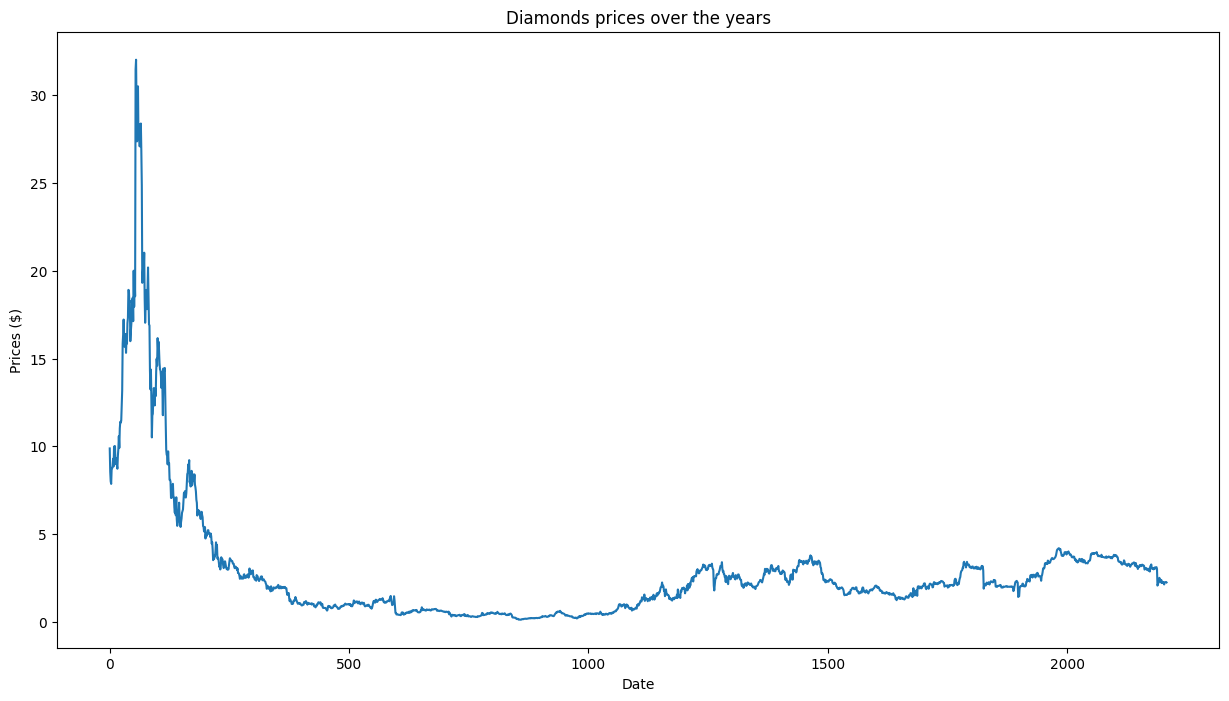

In [ ]:
#line graph to show the movement of diamonds prices
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.title('Diamonds prices over the years')
plt.plot(Diamonds['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')
#matplotlib will be used as the liabrary to make the graph
#plt.figure specifies the size of the graph
#lables specify which attributes to be selected for the graph

Text(0, 0.5, 'Prices ($)')

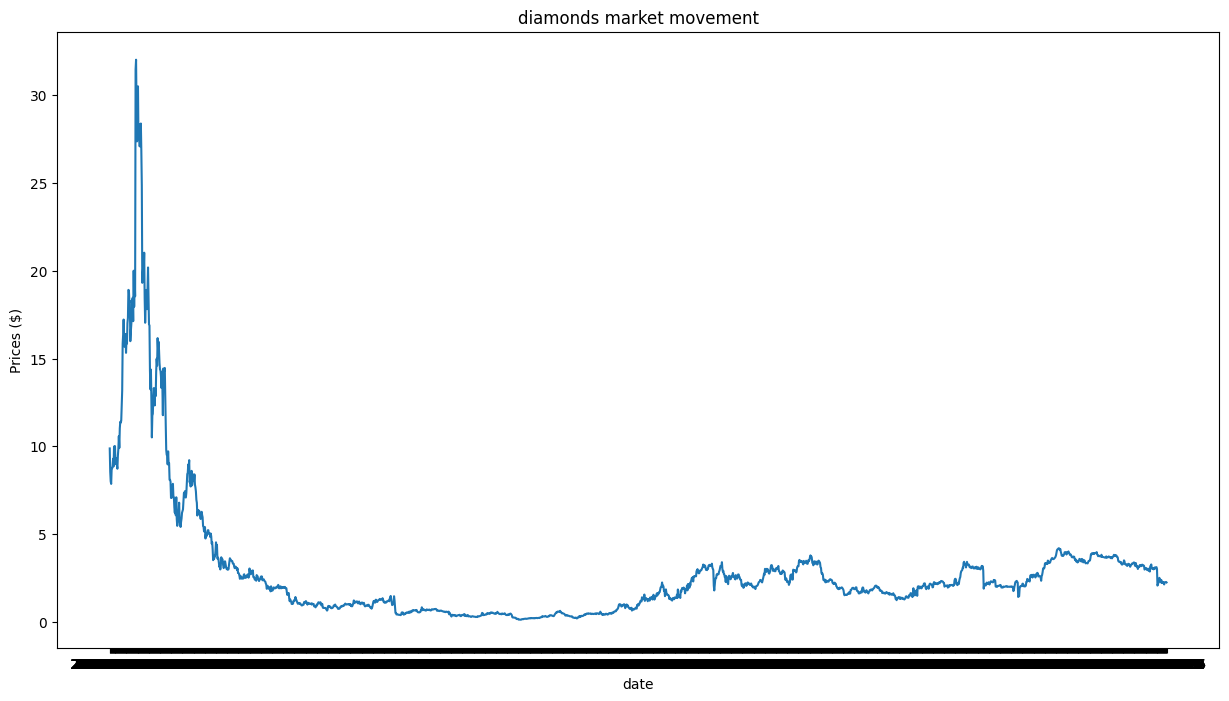

In [ ]:
#line graph to show the movement of diamonds stocks
plt.figure(figsize=(15, 8))
plt.title('diamonds market movement')
plt.plot(Diamonds['Date'],Diamonds['Close'])
plt.xlabel('date')
plt.ylabel('Prices ($)')

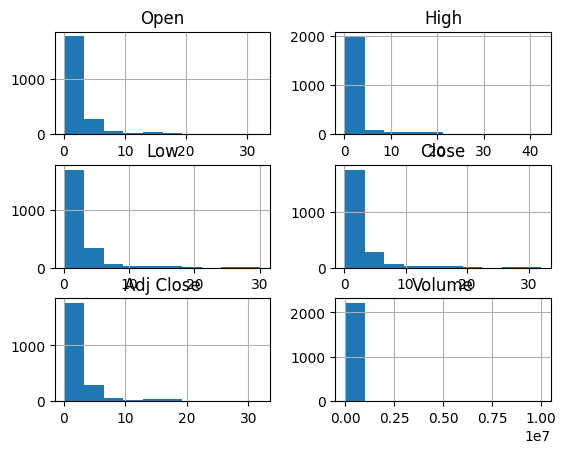

In [ ]:
#HISTOGRAMS OF ALL THE VARIABLES
Diamonds.hist()
plt.show()
#Diamonds.hist () shows all the relationships between all the attriutes
#Like line graph it also uses matplotlib
#plt.show command displays the histograph

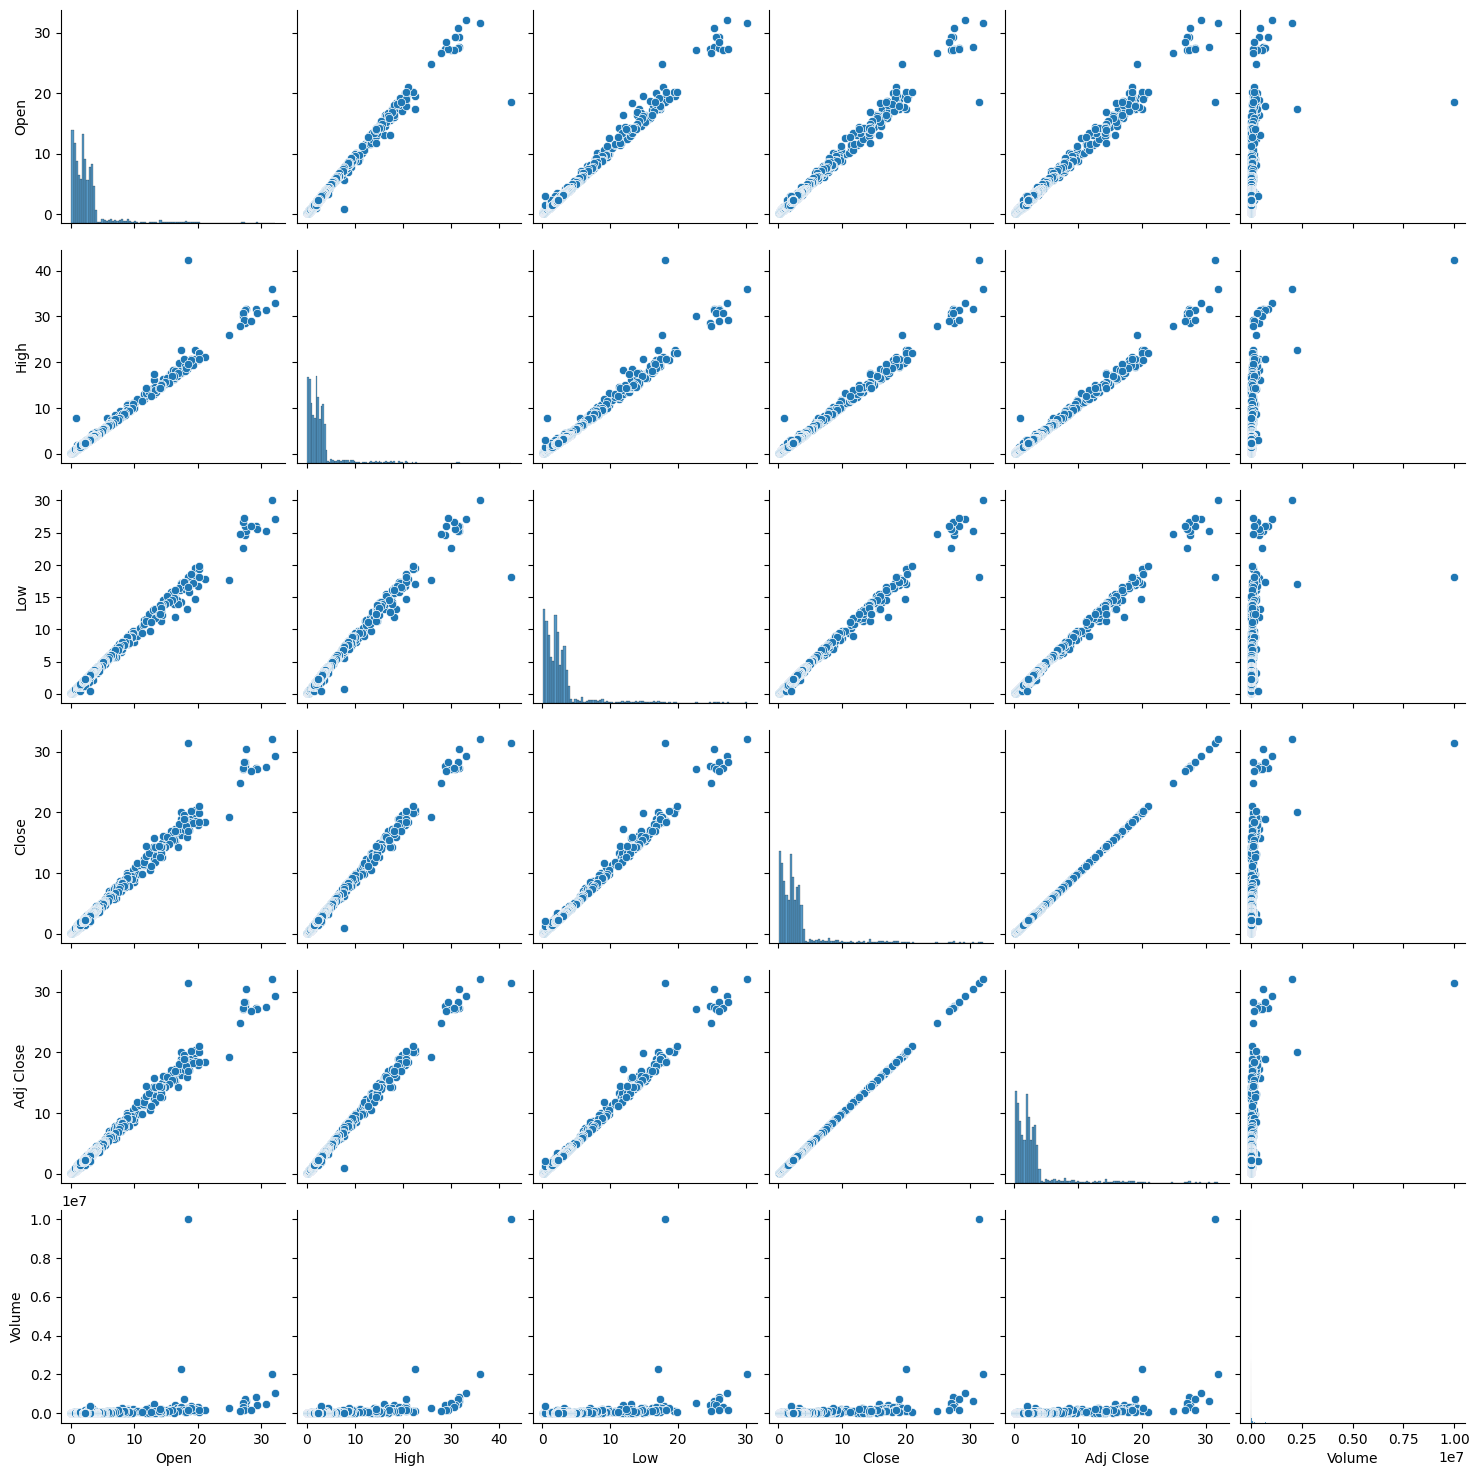

In [ ]:
#PAIRPLOTS(SEABORN)
sns.pairplot(Diamonds)
#pairplots will be made from different attributes using seaborn to show correlation between the different attributes

<ipython-input-23-67f2e2efa312>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Diamonds.corr(),annot=True,linewidths=0.2)


<Axes: >

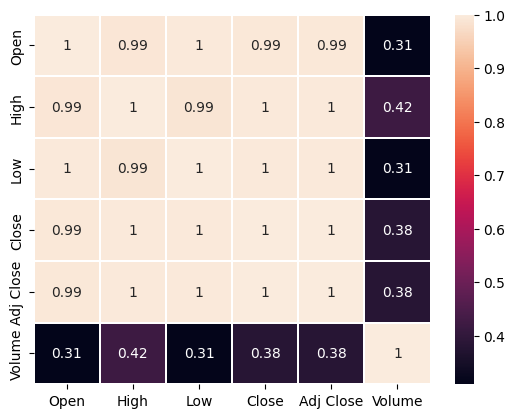

In [ ]:
#HEATMAP(SEABORN)
sns.heatmap(Diamonds.corr(),annot=True,linewidths=0.2)
#seaborn will be used to make a heatmap to show statistical correlation between attributes
#annot=True sets the annotation to be on and linewidth specifies the size

DATA PREPROCESSING

The dataset imported above, is then preproccessed to be ready for modelling. The preprocessing techniques include data normalization feature engineering ,data splitting into training and testing. The dataset does not require any cleaning because the source is Yahoofinance

In [ ]:


#feature engineering
close = Diamonds['Close']
values = close.values
#close was chosen as the attribute to be used for the model

#TRAINING DATA
training_data_len = math.ceil(len(values)* 0.8)
#the training data was set at 80% using math liabrary which converted 80% into decimal which is the 0.8 shown above

#DATA NORMALIZATION
scaler_data = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_data.fit_transform(values.reshape(-1,1))
#the data has been normalized so that all the values  can range from 0-1, this is done to avoid overfitting of the model

train_data = scaled_data[0: training_data_len, :]
#the scaled data will be used as training data

#creating an empty list
x_train = []
y_train = []
#


#creating a window as 60
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
#the model will be trained with a 60 day window

#np array
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#numpy is used to set arrays


In [ ]:
#Testing data
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]
#the test data will be the remaining data from the data split, also using scaled data

#60 days window
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
#the model will be tested with a 60 day window

#np array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#numpy is used to set arrays

MODEL BUILDING
LSTM

In [ ]:
#LSTM MODEL BUILDING
model = keras.Sequential()
#the model defined using keras
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
#layers of LSTM are then added to the defined model, the first one return sequences while the other one does not
model.add(layers.Dense(25))
model.add(layers.Dense(1))
#2 layers of dense are then added but with different parameters
model.summary()
#the model summary is then printed

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TRAINING THE ABOVE MODEL

Adam has been selected as the optimizer. Mean squared error will be used to monitor loss.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 32, epochs=100)
#the model will be trained with a batch size of 32 and 100 iterations(epochs)

Epoch 1/100
54/54 [==============================] - 11s 107ms/step - loss: 0.0011
Epoch 2/100
54/54 [==============================] - 5s 85ms/step - loss: 4.8661e-04
Epoch 3/100
54/54 [==============================] - 6s 106ms/step - loss: 2.8287e-04
Epoch 4/100
54/54 [==============================] - 6s 118ms/step - loss: 2.6677e-04
Epoch 5/100
54/54 [==============================] - 5s 84ms/step - loss: 3.9645e-04
Epoch 6/100
54/54 [==============================] - 5s 90ms/step - loss: 2.6657e-04
Epoch 7/100
54/54 [==============================] - 7s 132ms/step - loss: 2.1743e-04
Epoch 8/100
54/54 [==============================] - 5s 85ms/step - loss: 2.1940e-04
Epoch 9/100
54/54 [==============================] - 5s 85ms/step - loss: 1.8051e-04
Epoch 10/100
54/54 [==============================] - 7s 136ms/step - loss: 1.5901e-04
Epoch 11/100
54/54 [==============================] - 5s 89ms/step - loss: 1.8161e-04
Epoch 12/100
54/54 [==============================] - 5s 84ms

EVALUATION

Different evaluation metrics will be used to measure the perfomance of the model

In [ ]:
#predicting the prices from test data
predictions = model.predict(x_test)
predictions = scaler_data.inverse_transform(predictions)
#the test data will be used to make prediction



14/14 [==============================] - 2s 38ms/step


In [ ]:
#ROOT MEAN SQUARED ERROR
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
#rmse should be as close to 0 as possible if the model is performing well

0.08699489582298782

In [ ]:
#forecasting
from dateutil.parser import parse
from dateutil.rrule import rrule, DAILY, MO, TU, WE, TH, FR

result = rrule(
  DAILY,
  byweekday=(MO,TU,WE,TH,FR),
  dtstart=parse('2021-12-01'),
  until=parse('2022-05-31')
)

list(result)

[datetime.datetime(2021, 12, 1, 0, 0),
 datetime.datetime(2021, 12, 2, 0, 0),
 datetime.datetime(2021, 12, 3, 0, 0),
 datetime.datetime(2021, 12, 6, 0, 0),
 datetime.datetime(2021, 12, 7, 0, 0),
 datetime.datetime(2021, 12, 8, 0, 0),
 datetime.datetime(2021, 12, 9, 0, 0),
 datetime.datetime(2021, 12, 10, 0, 0),
 datetime.datetime(2021, 12, 13, 0, 0),
 datetime.datetime(2021, 12, 14, 0, 0),
 datetime.datetime(2021, 12, 15, 0, 0),
 datetime.datetime(2021, 12, 16, 0, 0),
 datetime.datetime(2021, 12, 17, 0, 0),
 datetime.datetime(2021, 12, 20, 0, 0),
 datetime.datetime(2021, 12, 21, 0, 0),
 datetime.datetime(2021, 12, 22, 0, 0),
 datetime.datetime(2021, 12, 23, 0, 0),
 datetime.datetime(2021, 12, 24, 0, 0),
 datetime.datetime(2021, 12, 27, 0, 0),
 datetime.datetime(2021, 12, 28, 0, 0),
 datetime.datetime(2021, 12, 29, 0, 0),
 datetime.datetime(2021, 12, 30, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.d

<ipython-input-21-e46e829b2eef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


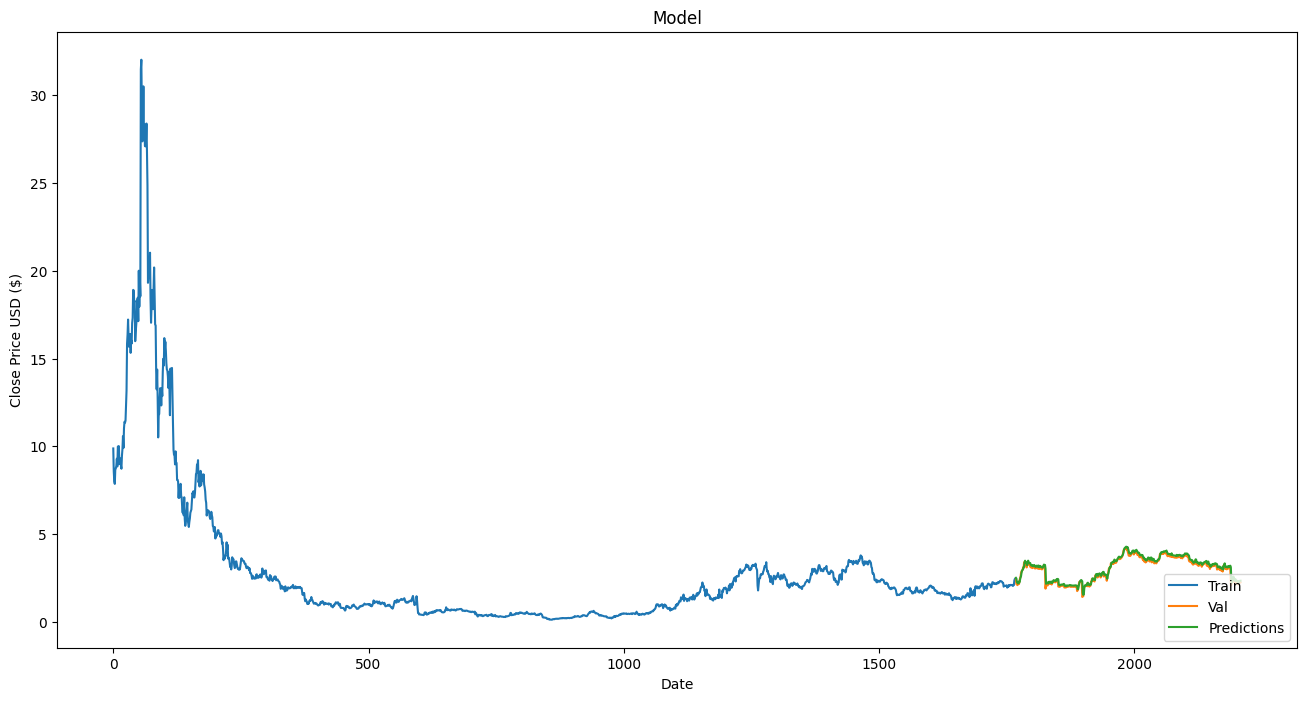

In [ ]:
#Visualizing the predicted data
data = Diamonds.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
#3 variables will be plotted , the training data, prediction and validation
#prediction refers to the predicted values and validation refers to the actual values from the testing data

In [ ]:
validation
#validation seeks to find the difference between the actual values and predicted values
#the actual values and the predicted values should be as close as possible

,Close,Predictions
1768,2.406519,2.512879
1769,2.154686,2.471377
1770,2.167863,2.260596
1771,2.096957,2.239045
1772,2.137354,2.190299
...,...,...
2204,2.253470,2.228220
2205,2.262462,2.310369
2206,2.272477,2.336085
2207,2.276209,2.344693


from matplotlib import pyplot as plt
validation['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
validation['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
validation.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
validation['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
validation['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)
#mae is also used as a performance metric from sklearn and it has to be as close to 0 as possible

0.3245335776724956

Using different hyper parameters

Hyper parameters will be changed to see if the model will still be able to perform well

In [ ]:
#LSTM MODEL BUILDING
model = keras.Sequential()
#the model defined using keras
model.add(layers.LSTM(25, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(25, return_sequences=False))
#layers of LSTM are then added to the defined model, the first one return sequences while the other one does not
model.add(layers.Dense(25))
model.add(layers.Dense(1))
#2 layers of dense are then added but with different parameters
model.summary()
#the model summary is then printed
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 10, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 25)            2700      
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 25)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8476 (33.11 KB)
Trainable params: 8476 (33.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
171/171 [==============================] - 14s 47ms/step - loss: 7.7155e-04
Epoch 2/25
171/171 [==============================] - 10s 60ms/step

In [ ]:
#predicting the prices from test data
predictions = model.predict(x_test)
predictions = scaler_data.inverse_transform(predictions)
#the test data will be used to make prediction

#ROOT MEAN SQUARED ERROR
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
#rmse should be as close to 0 as possible if the model is performing well


14/14 [==============================] - 0s 11ms/step


0.3119723697191442

In [ ]:
#MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)
#mae is also used as a performance metric from sklearn and it has to be as close to 0 as possible

0.3245335776724956